<a href="https://colab.research.google.com/github/mon-ika349/fluffy-octo-succotash/blob/main/Copy_of_Level1MonikaSharma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Level 1 Task 1
Analyze the dataset to determine the **top three** most common cuisines 🥧 and calculate the percentage of restaurants that serve each of these top cuisines.

## Load the dataset

### Subtask:
Load the dataset from a CSV file into a pandas DataFrame.


In [ ]:
import os
print(os.listdir())

['.config', 'Dataset .csv', 'sample_data']


In [ ]:
df = pd.read_csv("Dataset .csv")
display(df.head())
display(df.info())

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

None

## Identify and count cuisines

### Subtask:
Identify the cuisine data and count the occurrences of each cuisine.


**Reasoning**:
To identify and count individual cuisines, I need to process the 'Cuisines' column by splitting the comma-separated values and then counting the occurrences of each cuisine.



In [ ]:
from collections import Counter

all_cuisines = df['Cuisines'].str.split(', ').explode()
cuisine_counts = Counter(all_cuisines)
cuisine_counts_series = pd.Series(cuisine_counts).sort_values(ascending=False)
display(cuisine_counts_series.head())

,0
North Indian,3960
Chinese,2735
Fast Food,1986
Mughlai,995
Italian,764


## Determine top cuisines

### Subtask:
Determine the top three most common cuisines based on the counts stored in `cuisine_counts_series`.


**Reasoning**:
Access the top three elements of the sorted `cuisine_counts_series` and store them in a list.



In [ ]:
top_three_cuisines = cuisine_counts_series.head(3).index.tolist()
print("Top three most common cuisines:", top_three_cuisines)

Top three most common cuisines: ['North Indian', 'Chinese', 'Fast Food']


## Calculate percentages

### Subtask:
Calculate the percentage of restaurants that serve each of the top three cuisines.


**Reasoning**:
Calculate the percentage of restaurants for each of the top three cuisines by counting restaurants containing each cuisine in the original dataframe and dividing by the total number of restaurants.



In [ ]:
total_restaurants = len(df)
cuisine_percentages = {}
for cuisine in top_three_cuisines:
    count = df['Cuisines'].str.contains(cuisine).sum()
    percentage = (count / total_restaurants) * 100
    cuisine_percentages[cuisine] = percentage
print("Percentage of restaurants serving the top three cuisines:")
for cuisine, percentage in cuisine_percentages.items():
    print(f"{cuisine}: {percentage:.2f}%")

Percentage of restaurants serving the top three cuisines:
North Indian: 41.46%
Chinese: 28.61%
Fast Food: 20.80%


## Display results

### Subtask:
Display the top three cuisines and their calculated percentages.


**Reasoning**:
Print the top three cuisines and their percentages as requested.



In [ ]:
print("Top three cuisines and their percentages:")
for cuisine, percentage in cuisine_percentages.items():
    print(f"{cuisine}: {percentage:.2f}%")

Top three cuisines and their percentages:
North Indian: 41.46%
Chinese: 28.61%
Fast Food: 20.80%


## Summary:

### Data Analysis Key Findings

*   The top three most common cuisines are North Indian, Chinese, and Fast Food.
*   41.46% of restaurants serve North Indian cuisine.
*   28.61% of restaurants serve Chinese cuisine.
*   20.80% of restaurants serve Fast Food cuisine.




# Task2
Analyze the dataset to determine the city with the highest number of restaurants and the city with the highest average rating 🔯

## Identify city with most restaurants

### Subtask:
Determine the city with the highest number of restaurants.


**Reasoning**:
Count the occurrences of each city and find the city with the highest count.



In [ ]:
city_counts = df['City'].value_counts()
city_most_restaurants = city_counts.index[0]
print(f"The city with the highest number of restaurants is: {city_most_restaurants}")

The city with the highest number of restaurants is: New Delhi


## Calculate average rating per city

### Subtask:
Calculate the average rating for restaurants in each city.


**Reasoning**:
Calculate the average rating for restaurants in each city by grouping by 'City' and taking the mean of 'Aggregate rating'.



In [ ]:
average_ratings_per_city = df.groupby('City')['Aggregate rating'].mean()
display(average_ratings_per_city.head())

,Aggregate rating
City,
Abu Dhabi,4.300000
Agra,3.965000
Ahmedabad,4.161905
Albany,3.555000
Allahabad,3.395000


## Identify city with highest average rating

### Subtask:
Determine the city with the highest average rating based on the calculated average ratings stored in `average_ratings_per_city`.


**Reasoning**:
Find the city with the highest average rating from the calculated average ratings and print the result.



In [ ]:
city_highest_avg_rating = average_ratings_per_city.idxmax()
print(f"The city with the highest average rating is: {city_highest_avg_rating}")

The city with the highest average rating is: Inner City


## Display results

### Subtask:
Display the city with the highest number of restaurants and the city with the highest average rating.


**Reasoning**:
Print the city with the highest number of restaurants and the city with the highest average rating as requested.



In [ ]:
print(f"The city with the highest number of restaurants is: {city_most_restaurants}")
print(f"The city with the highest average rating is: {city_highest_avg_rating}")

The city with the highest number of restaurants is: New Delhi
The city with the highest average rating is: Inner City


## Summary:



### Data Analysis Key Findings
* New Delhi has the highest number of restaurants among all the cities in the dataset.
* Inner City has the highest average restaurant rating.




# Task3
Analyze the distribution of price ranges 🔼 among restaurants , visualize it with a histogram or bar chart , and calculate the percentage of restaurants in each price range category.

## Analyze price range distribution

### Subtask:
Count the occurrences of each price range category.


**Reasoning**:
Count the occurrences of each price range category using the 'Price range' column and display the counts.



In [ ]:
price_range_counts = df['Price range'].value_counts()
display(price_range_counts)

,count
Price range,
1,4444
2,3113
3,1408
4,586


## Visualize price range distribution

### Subtask:
Create a histogram or bar chart to visualize the distribution of price ranges.


**Reasoning**:
Create a bar plot to visualize the distribution of price ranges using the calculated counts.



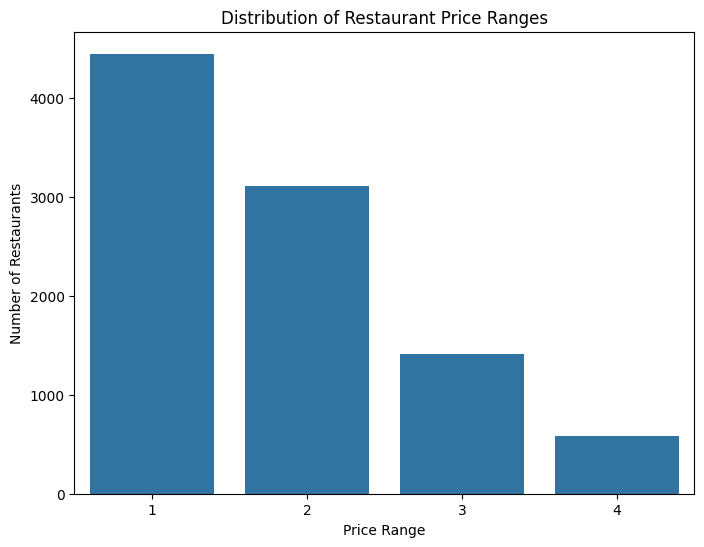

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.barplot(x=price_range_counts.index, y=price_range_counts.values)
plt.title("Distribution of Restaurant Price Ranges")
plt.xlabel("Price Range")
plt.ylabel("Number of Restaurants")
plt.show()

## Calculate price range percentages

### Subtask:
Calculate the percentage of restaurants in each price range category.


**Reasoning**:
Calculate the percentage of restaurants for each price range and display the results.



In [ ]:
total_restaurants = len(df)
price_range_percentages = (price_range_counts / total_restaurants) * 100
display(price_range_percentages)

,count
Price range,
1,46.529159
2,32.593446
3,14.741912
4,6.135483


## Display results

### Subtask:
Display the calculated percentages for each price range category.


**Reasoning**:
Print the calculated percentages for each price range category with a descriptive title.



In [ ]:
print("Percentage of restaurants in each price range category:")
display(price_range_percentages)

Percentage of restaurants in each price range category:


,count
Price range,
1,46.529159
2,32.593446
3,14.741912
4,6.135483
